## Loading data

In [1]:
import numpy as np
import os 
import glob

fname = os.path.join(r'..', r'data', r'optdigitsubset.txt')
data = np.loadtxt(fname)
labels = np.append(np.zeros(554), np.ones(571))
print(data.shape)
print(labels.shape)

(1125, 64)
(1125,)


Populating the interactive namespace from numpy and matplotlib
0.0


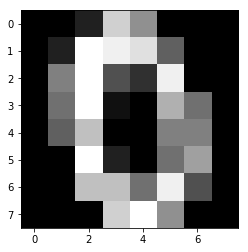

In [2]:
from matplotlib import pyplot as plt

dd = np.reshape(data, (len(data), 8, 8))
i = 10
%pylab inline
plt.imshow(dd[i,:,:], cmap= 'gray')
print(labels[i])

## Function plotting

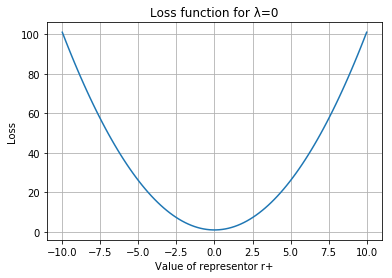

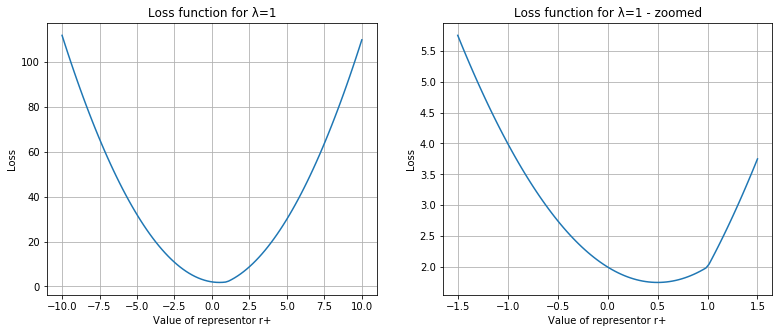

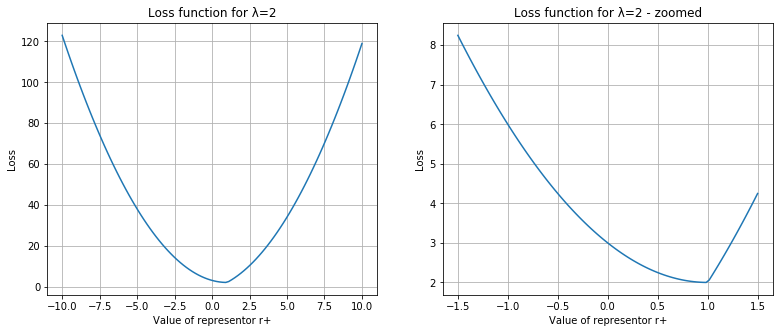

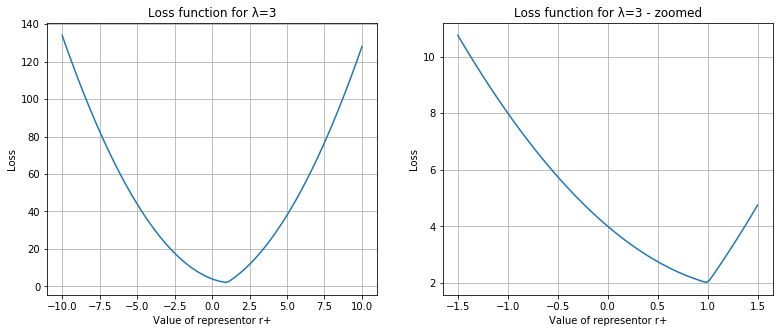

In [39]:
# lamda=0
r = np.linspace(-10, 10, 100)
rz = np.linspace(-1.5,1.5,100)
L = (1/2)*(-1-r)**2 + (1/2)*(1-r)**2 + 0*(np.abs(1-r))
plt.title("Loss function for λ=0")
plt.xlabel("Value of representor r+")
plt.ylabel("Loss")
plt.grid()
plt.plot(r,L)

#lamda = 1
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(13)
ax1.set_xlabel("Value of representor r+")
ax1.set_ylabel("Loss")
ax2.set_xlabel("Value of representor r+")
ax2.set_ylabel("Loss")
ax1.set_title("Loss function for λ=1")
ax2.set_title("Loss function for λ=1 - zoomed")
L = (1/2)*(-1-r)**2 + (1/2)*(1-r)**2 + 1*(np.abs(1-r))
Lz = (1/2)*(-1-rz)**2 + (1/2)*(1-rz)**2 + 1*(np.abs(1-rz))
ax1.grid()
ax1.plot(r,L)
ax2.grid()
ax2.plot(rz,Lz)

#lamda = 2
fig2, (ax21, ax22) = plt.subplots(1,2)
fig2.set_figheight(5)
fig2.set_figwidth(13)
ax21.set_title("Loss function for λ=2")
ax22.set_title("Loss function for λ=2 - zoomed")
ax21.set_xlabel("Value of representor r+")
ax21.set_ylabel("Loss")
ax22.set_xlabel("Value of representor r+")
ax22.set_ylabel("Loss")
L = (1/2)*(-1-r)**2 + (1/2)*(1-r)**2 + 2*(np.abs(1-r))
Lz = (1/2)*(-1-rz)**2 + (1/2)*(1-rz)**2 + 2*(np.abs(1-rz))
ax21.grid()
ax21.plot(r,L)
ax22.grid()
ax22.plot(rz,Lz)

#lamda = 3
fig3, (ax31, ax32) = plt.subplots(1,2)
fig3.set_figheight(5)
fig3.set_figwidth(13)
ax31.set_title("Loss function for λ=3")
ax32.set_title("Loss function for λ=3 - zoomed")
ax31.set_xlabel("Value of representor r+")
ax31.set_ylabel("Loss")
ax32.set_xlabel("Value of representor r+")
ax32.set_ylabel("Loss")
L = (1/2)*(-1-r)**2 + (1/2)*(1-r)**2 + 3*(np.abs(1-r))
Lz = (1/2)*(-1-rz)**2 + (1/2)*(1-rz)**2 + 3*(np.abs(1-rz))
ax31.grid()
ax31.plot(r,L)
ax32.grid()
ax32.plot(rz,Lz)

## Stochastic Gradient Descent

In [40]:
# Initialising the two representors. We adopt the convention that r0 stands for zero-class "-" and r1 stands for the 
# representor of ones-class "+"
r0 = np.rint(np.random.rand(64) * 255)
r1 = np.rint(np.random.rand(64) * 255)
#print(r0)
#print(r1)


In [4]:
# Initialise the learning rate and the weight vector
l = 0.001
lamda = 2
iter = 5000

# number of class samples
N0 = 554
N1 = 571

# creating copies of the representors, so as reproduction of the results is possible
rr0=r0
rr1=r1
it = 0
for i in range(iter):
   # a = np.sum((1/N0) * np.sum(-2*(data[0:554,:] - rr0), 1))
    a = np.sum((-2/N0) * (data[0:554,:] - rr0), 0)
    b = np.divide(rr0-rr1, np.absolute(rr0-rr1))
    #b = lamda * np.sum(np.nan_to_num(b, False))
    b = lamda * np.nan_to_num(b, False)
    #c = np.sum((1/N1) * np.sum(-2*(data[554:1125,:] - rr1), 1))
    c = np.sum((-2/N1) * (data[554:1125,:] - rr1), 0)  

    # gradients of the loss function L
    dlr0 = a+b
    dlr1 = c-b
    #print(a, b,c)
    #print(dlr0, dlr1)
    
    # update of the representors
    prr0 = rr0
    prr1 = rr1
    rr0 = rr0 - l*dlr0
    rr1 = rr1 - l*dlr1
    it+=1
    #print(np.absolute(np.sum(prr0-rr0)) + np.absolute(np.sum(prr1-rr1)))
    if np.absolute(np.sum(prr0-rr0)) + np.absolute(np.sum(prr1-rr1)) < 1e-8:
        break
    


C:\Users\giann\Anaconda3\envs\machine-learning\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


## Adagrad Implementation

In [41]:
# Initialise the learning rate and the weight vector
l = 100
lamda = 1000
iter = 5000
epsilon = 1e-6
G0 = np.zeros(64)
G1 = np.zeros(64)

# number of class samples
N0 = 554
N1 = 571

# creating copies of the representors, so as reproduction of the results is possible
rr0=r0
rr1=r1
it = 0
for i in range(iter):
   # a = np.sum((1/N0) * np.sum(-2*(data[0:554,:] - rr0), 1))
    a = np.sum((-2/N0) * (data[0:554,:] - rr0), 0)
    b = np.divide(rr0-rr1, np.absolute(rr0-rr1))
    #b = lamda * np.sum(np.nan_to_num(b, False))
    b = lamda * np.nan_to_num(b, False)
    #c = np.sum((1/N1) * np.sum(-2*(data[554:1125,:] - rr1), 1))
    c = np.sum((-2/N1) * (data[554:1125,:] - rr1), 0)  

    # gradients of the loss function L
    dlr0 = a+b
    dlr1 = c-b
    #print(a, b,c)
    #print(dlr0, dlr1)
    
    # extracting the diagonal elements of the 
    G0 = G0 + np.power(dlr0, 2)
    G1 = G1 + np.power(dlr1, 2)
    #print(G0,G1)
    
    # update of the representors
    prr0 = rr0
    prr1 = rr1
    rr0 = rr0 - l * dlr0 / (np.sqrt(G0) + epsilon) 
    rr1 = rr1 - l * dlr1 / (np.sqrt(G1) + epsilon)
    
    it+=1
    #print(np.absolute(np.sum(prr0-rr0)) + np.absolute(np.sum(prr1-rr1)))
    if np.absolute(np.sum(prr0-rr0)) + np.absolute(np.sum(prr1-rr1)) < 1e-8:
        break
    

    

5000


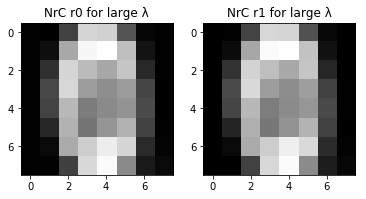

In [44]:
print(it)
fig,(ax1, ax2) = plt.subplots(1,2)
ax1.set_title('NrC r0 for large λ')
ax2.set_title('NrC r1 for large λ')
ax1.imshow(np.reshape(rr0,[8,8]), cmap='gray')
ax2.imshow(np.reshape(rr1,[8,8]), cmap = 'gray')

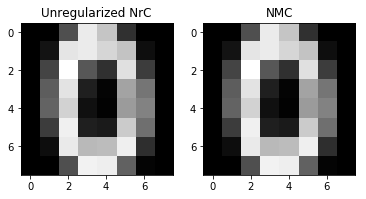

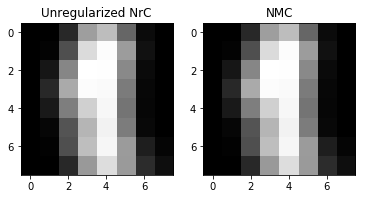

In [159]:
fig,(ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Unregularized NrC')
ax2.set_title('NMC')
d0 = np.mean(data[0:554,:], 0)
ax1.imshow(np.reshape(rr0,[8,8]), cmap='gray')
ax2.imshow(np.reshape(d0,[8,8]), cmap = 'gray')

fig,(ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Unregularized NrC')
ax2.set_title('NMC')
d1 = np.mean(data[554:1125,:], 0)
ax1.imshow(np.reshape(rr1,[8,8]), cmap='gray')
ax2.imshow(np.reshape(d1,[8,8]), cmap = 'gray')


In [43]:
# This function implements the Adagrad optimization algorithm, enabling the utilization of an adaptive learning rate to boost 
# convergence. A higher original learning rate usually has to be used.
# Input Parameters : l = learning rate, lamda= regularization parameter, epsilon: fudging factor to prevent division by zero, 
#                    data0= samples for class 0, data1 = smaples for class 1, r0-r1: the random initialization of the two representors
# Output Parameters: the final converged or not representors rr0, rr1
def Adagrad(l, lamda, iter, epsilon, data0, data1, r0, r1):
    rr0=r0
    rr1=r1
    it = 0
    N0 = 1
    N1 = 1
    # history parameter of the sum of squuares of grad for the adaptation of the learning rate
    G0 = np.zeros(64)
    G1 = np.zeros(64)
    for i in range(iter):
        # In case more than one samples are used the first has to be uncommented
        a = (-2/N0) * (data0 - rr0)
        #a = np.sum((-2/N0) * (data0 - rr0), 0)
        b = np.divide(rr0-rr1, np.absolute(rr0-rr1))
        b = lamda * np.nan_to_num(b, False)
        c = (-2/N1) * (data1 - rr1)
        #c = np.sum((-2/N1) * (data1 - rr1), 0)  
        
        # gradients of the loss function L
        dlr0 = a+b
        dlr1 = c-b
        #print(a,c)
        #print(dlr0, dlr1)

        # updating the historical parameter G
        G0 = G0 + np.power(dlr0, 2)
        G1 = G1 + np.power(dlr1, 2)
        #print(G0,G1)

        # update of the representors
        prr0 = rr0
        prr1 = rr1
        rr0 = rr0 - l * dlr0 / (np.sqrt(G0) + epsilon) 
        rr1 = rr1 - l * dlr1 / (np.sqrt(G1) + epsilon)

        it+=1
       # print(np.absolute(np.sum(prr0-rr0)) + np.absolute(np.sum(prr1-rr1)))
        if np.absolute(np.sum(prr0-rr0)) + np.absolute(np.sum(prr1-rr1)) < 1e-8:
            break
    return rr0, rr1

# This function implements label predictions for the supplied dataset, based on distance from the two representors
# Input parameters: data= the given dataset, rr0-rr1: the two representors for class 0 and class 1 respectively
# Output parameters: pred = vector array with the predicted labels
def predict(data, rr0, rr1):
    dis0 = np.linalg.norm(data - rr0, axis=1)
    dis1 = np.linalg.norm(data - rr1, axis=1)
    pred = dis0 - dis1
    pred[pred>=0] = 1
    pred[pred<0] = 0
    return pred


from matplotlib.axes import Axes as axes
def plot_regression_curves(l, lamdas, iter, epsilon, rep, data, r0, r1):
    mean_true_error = np.zeros(len(lamdas))
    mean_apparent_error = np.zeros(len(lamdas))
    std_true_error = np.zeros(len(lamdas))
    std_apparent_error = np.zeros(len(lamdas))
    c = 0
    y = np.zeros(554)
    y = np.append(y, np.ones(571))
    
    a_error = np.zeros(rep)
    t_error = np.zeros(rep)
    for ll in lamdas:
        for i in range(rep):
            # this is for the shuffling of the data array 
            # permutation takes place after removing the training samples
            ind = (np.floor(np.random.rand(2) * np.array([554, 571])) + np.array([0, 554])).astype(int)
            ii = np.arange(len(data))
            iip = np.random.permutation(np.delete(ii, ind))
            rr0, rr1 = Adagrad(l, ll, iter, epsilon, data[ind[0], :], data[ind[1], :], r0, r1)
            predt = predict(data[iip,:], rr0, rr1)
            preda = predict(data[ind,:], rr0, rr1)
            a_error[i] = np.sum(np.absolute(preda - y[ind]))/len(preda)
            t_error[i] = np.sum(np.absolute(predt - y[iip]))/len(predt)
        mean_true_error[c] = np.mean(t_error)
        mean_apparent_error[c] = np.mean(a_error)
        std_true_error[c] = np.std(t_error)
        std_apparent_error[c] = np.std(a_error)
        c = c+1

    fig = plt.figure()
    plt.title('Regularization Curves')
    plt.xlabel("Regularization parameter lamda")
    plt.ylabel("Error rate")
    aa = np.arange(len(lamdas))
    plt.fill_between(aa, mean_true_error - std_true_error,
                     mean_true_error + std_true_error, alpha=0.1, color="r")
    plt.plot(aa, mean_true_error, 'o-', color="r", label = 'True Error')
    plt.fill_between(aa, mean_apparent_error - std_apparent_error,
                    mean_apparent_error + std_apparent_error, alpha=0.1, color="g")
    plt.plot(aa, mean_apparent_error, 'o-', color="g", label = 'Apparent Error')
    plt.axis([0, 1, 0, 1], aspect = 'equal')
    #axes.set_xticks(aa) #set the ticks to be a
    #plt.axes.set_xticklabels(labels=['0', '0.1', '1', '10', '100', '1000']) # change the ticks' names to x
    labels = ['0', '0.1', '1', '10', '100', '1000']
    plt.xticks(aa, labels, rotation = 'horizontal')
    plt.grid()
    plt.legend(loc="best")
    
    d0=data[ind[0], :]
    d1=data[ind[1], :]
    return rr0, rr1,d0,d1, plt

## Regularization curves

C:\Users\giann\Anaconda3\envs\machine-learning\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


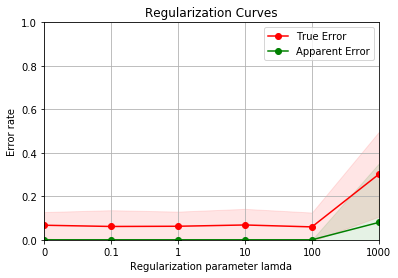

In [196]:
l = 100
lamdas = np.array([0, 1/10, 1, 10, 100, 1000])
iter = 2000
epsilon = 1e-6
rep = 100

rr0, rr1,d0,d1, plt = plot_regression_curves(l, lamdas, iter, epsilon, rep, data, r0, r1)
